In [2]:
import os
import numpy as np
from tomography_radon import get_rmse, plot_fbp_reconstruction, get_system, get_ssim
from skimage.filters import threshold_mean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Shepp-Logan

In [3]:
# RMSE
search_path = 'Results/ResultsSheppLoganNC_16/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg")]
rms = np.zeros((1, 4, 4))
print(images)
for f, i in zip(images, range(len(images))):
    sizes = ['4', '8', '16', '32']
    for s, j in zip(sizes, range(len(sizes))):
        res = [x for x in os.listdir(search_path + f + '/' + s) if x.endswith('.npz')]
        if res: 
            res_npz = np.load(search_path + f + '/' + s + '/' + res[0])
            image = res_npz['image']
            recon_fbp = res_npz['reconstruction_fbp']
            recon_sart = res_npz['reconstruction_sart']
            recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
            system = get_system(image)
            sinogram = res_npz['sinogram']
            recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
            rmse_qa = get_rmse(recon_qa, image)
            rmse_fbp = get_rmse(recon_fbp, image)
            rmse_sart = get_rmse(recon_sart, image)
            rmse_pi = get_rmse(recon_pi, image)
            rms[i, j, 0] = rmse_fbp
            rms[i, j, 1] = rmse_sart
            rms[i, j, 2] = rmse_pi
            rms[i, j, 3] = rmse_qa

['shepp-logan']


In [4]:
# SSIM
search_path = 'Results/ResultsSheppLoganNC_16/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg")]
ssim = np.zeros((1, 4, 4))
print(images)
for f, i in zip(images, range(len(images))):
    sizes = ['4', '8', '16', '32']
    for s, j in zip(sizes, range(len(sizes))):
        if j == 0:
            res = [x for x in os.listdir(search_path + f + '/' + s) if x.endswith('.npz')]
            if res: 
                res_npz = np.load(search_path + f + '/' + s + '/' + res[0])
                image = res_npz['image']
                recon_fbp = res_npz['reconstruction_fbp']
                recon_sart = res_npz['reconstruction_sart']
                recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
                system = get_system(image)
                sinogram = res_npz['sinogram']
                recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
                ssim_qa = get_ssim(np.resize(recon_qa, (8,8)), np.resize(image, (8,8)))[0]
                ssim_fbp = get_ssim(np.resize(recon_fbp, (8,8)), np.resize(image, (8,8)))[0]
                ssim_sart = get_ssim(np.resize(recon_sart, (8,8)), np.resize(image, (8,8)))[0]
                ssim_pi = get_ssim(np.resize(recon_pi, (8,8)), np.resize(image, (8,8)))[0]
                ssim[i, j, 0] = ssim_fbp
                ssim[i, j, 1] = ssim_sart
                ssim[i, j, 2] = ssim_pi
                ssim[i, j, 3] = ssim_qa
        else:
            res = [x for x in os.listdir(search_path + f + '/' + s) if x.endswith('.npz')]
            if res: 
                res_npz = np.load(search_path + f + '/' + s + '/' + res[0])
                image = res_npz['image']
                recon_fbp = res_npz['reconstruction_fbp']
                recon_sart = res_npz['reconstruction_sart']
                recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
                system = get_system(image)
                sinogram = res_npz['sinogram']
                recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
                ssim_qa = get_ssim(recon_qa, image)[0]
                ssim_fbp = get_ssim(recon_fbp, image)[0]
                ssim_sart = get_ssim(recon_sart, image)[0]
                ssim_pi = get_ssim(recon_pi, image)[0]
                ssim[i, j, 0] = ssim_fbp
                ssim[i, j, 1] = ssim_sart
                ssim[i, j, 2] = ssim_pi
                ssim[i, j, 3] = ssim_qa

['shepp-logan']


C:\Users\z004c7cw\Anaconda3\envs\dwave\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


## Plot images

In [ ]:
search_path = 'Results/ResultsInteger/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png")  and not _.endswith(".svg")]
rms = np.zeros((1, 4, 3))
print(images)
for f, i in zip(images, range(len(images))):
    sizes = ['4', '8', '16', '32']
    columns = 6
    print(columns)
    rows = len(sizes)
    fig, ax = plt.subplots(rows, columns, figsize=(16, 16), gridspec_kw={'hspace': -0.6, 'wspace': 0.15})
    for s, j in zip(sizes, range(len(sizes))):
        res = [x for x in os.listdir(search_path + f + '/' + s) if x.endswith('.npz')]
        if res: 
            res_npz = np.load(search_path + f + '/' + s + '/' + res[0])
            image = res_npz['image']
            recon_fbp = res_npz['reconstruction_fbp']
            recon_sart = res_npz['reconstruction_sart']
            recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
            system = get_system(image)
            sinogram = res_npz['sinogram']
            recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
            ax[j, 0].imshow(image, cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 0].set_xticks([])
            ax[j, 0].set_yticks([])  
            ax[j, 1].imshow(sinogram.reshape(image.shape), cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 1].set_xticks([])
            ax[j, 1].set_yticks([])  
            # fig.add_subplot(rows, columns, j*columns + 2)
            ax[j, 2].imshow(recon_fbp, cmap='gray')
            #ax[j, 1].axis("off")
            ax[j, 2].set_xticks([])
            ax[j, 2].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 3)
            ax[j, 3].imshow(recon_sart, cmap='gray')
            # ax[j, 2].axis("off")
            ax[j, 3].set_xticks([])
            ax[j, 3].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 4)
            ax[j, 4].imshow(recon_pi, cmap='gray')
            #ax[j, 3].axis("off")
            ax[j, 4].set_xticks([])
            ax[j, 4].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 5)
            ax[j, 5].imshow(recon_qa, cmap='gray')
            #ax[j, 4].axis("off")
            ax[j, 5].set_xticks([]) 
            ax[j, 5].set_yticks([])
    cols = ["GT", "SG", "FBP", "SART", "PI", "QA"]
    for axe, col in zip(ax[0], cols):
        axe.set_title(col, size=40)
    # rows = ["4 x 4 px", "8 x 8 px", "12 x 12 px", "16 x 16 px", "20 x20 px", "24 x 24 px", "28 x 28 px", "32 x 32 px"]
    rows = sizes
    for axe, row in zip(ax[:,0], rows):
        axe.set_ylabel(row, rotation=0, size=40)
        axe.yaxis.set_label_coords(-.5, 0.3)
    fig.tight_layout()
    print(f)
    plt.savefig(search_path + f + ".png", bbox_inches='tight')
            

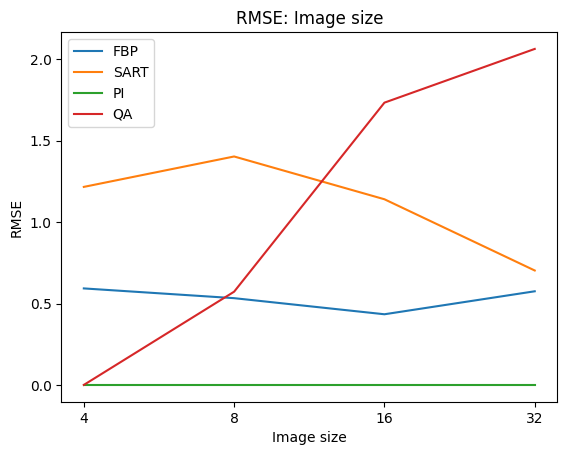

In [5]:
#RMSE
import matplotlib.pyplot as plt
mat_sizes = [4, 8, 16, 32]
plt.plot(rms[0, :, 0], label="FBP")
plt.plot(rms[0, :, 1], label="SART")
plt.plot(rms[0, :, 2], label="PI")
plt.plot(rms[0, :, 3], label="QA")
plt.xticks(range(len(mat_sizes)), mat_sizes)
plt.xlabel("Image size")
plt.ylabel("RMSE")
plt.title("RMSE: Image size")
plt.legend()
plt.savefig("Results/ResultsSheppLoganNC_16/shepp_logan_rmse.svg", format='svg')
plt.savefig("Results/ResultsSheppLoganNC_16/shepp_logan_rmse.png", format='png')
plt.savefig("Results/ResultsSheppLoganNC_16/shepp_logan_rmse.pdf", format='pdf')
plt.show()

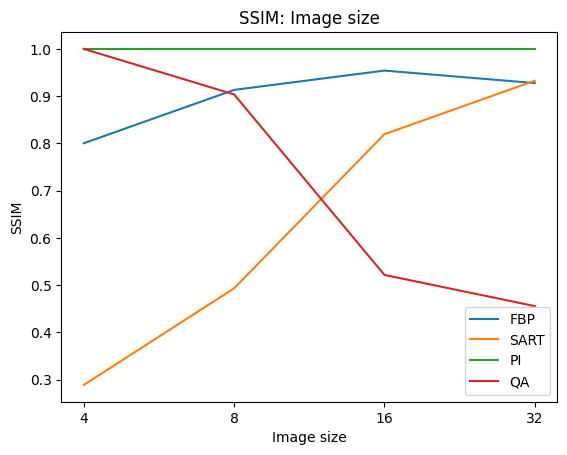

In [6]:
#RMSE
import matplotlib.pyplot as plt
mat_sizes = [4, 8, 16, 32]
plt.plot(ssim[0, :, 0], label="FBP")
plt.plot(ssim[0, :, 1], label="SART")
plt.plot(ssim[0, :, 2], label="PI")
plt.plot(ssim[0, :, 3], label="QA")
plt.xticks(range(len(mat_sizes)), mat_sizes)
plt.xlabel("Image size")
plt.ylabel("SSIM")
plt.title("SSIM: Image size")
plt.legend()
plt.savefig("Results/ResultsSheppLoganNC_16/shepp_logan_ssim.svg", format='svg')
plt.savefig("Results/ResultsSheppLoganNC_16/shepp_logan_ssim.png", format='png')
plt.savefig("Results/ResultsSheppLoganNC_16/shepp_logan_ssim.pdf", format='pdf')
plt.show()

## Digits: Plot

In [ ]:
import random
search_path = 'Results/ResultsDigits/'
all_images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg")]
random.shuffle(all_images)
print(all_images)
all_images = ['1499', '956', '1440', '577', '714', '1253', '1745', '1475', '271', '1301', '19', '174', '548', '1763', '939', '97', '147', '1114', '204', '303', '1189', '1377', '553', '357', '1330', '1533', '1188', '1075', '1145', '98', '1245', '654']
for i in range(0, len(all_images), 4):
    images = all_images[i:i+4]
    print(images)
    columns = 6
    rows = len(images)
    fig, ax = plt.subplots(rows, columns, figsize=(16, 16), gridspec_kw={'hspace': -0.6, 'wspace': 0.15})
    for f, j in zip(images, range(len(images))):
        res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
        if res: 
            res_npz = np.load(search_path + f + '/' + res[0])
            image = res_npz['image']
            recon_fbp = res_npz['reconstruction_fbp']
            recon_sart = res_npz['reconstruction_sart']
            recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
            system = get_system(image)
            sinogram = res_npz['sinogram']
            recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
            ax[j, 0].imshow(image, cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 0].set_xticks([])
            ax[j, 0].set_yticks([])  
            ax[j, 1].imshow(sinogram.reshape(image.shape), cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 1].set_xticks([])
            ax[j, 1].set_yticks([])  
            # fig.add_subplot(rows, columns, j*columns + 2)
            ax[j, 2].imshow(recon_fbp, cmap='gray')
            #ax[j, 1].axis("off")
            ax[j, 2].set_xticks([])
            ax[j, 2].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 3)
            ax[j, 3].imshow(recon_sart, cmap='gray')
            # ax[j, 2].axis("off")
            ax[j, 3].set_xticks([])
            ax[j, 3].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 4)
            ax[j, 4].imshow(recon_pi, cmap='gray')
            #ax[j, 3].axis("off")
            ax[j, 4].set_xticks([])
            ax[j, 4].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 5)
            ax[j, 5].imshow(recon_qa, cmap='gray')
            #ax[j, 4].axis("off")
            ax[j, 5].set_xticks([]) 
            ax[j, 5].set_yticks([])
    cols = ["GT", "SG", "FBP", "SART", "PI", "QA"]
    for axe, col in zip(ax[0], cols):
        axe.set_title(col, size=40)
    fig.tight_layout()
    plt.savefig(search_path + f + ".png", bbox_inches='tight')

## Calc RMSE

In [7]:
search_path = 'Results/ResultsDigits/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg")]
rms = np.zeros((32, 4))
print(images)
for f, i in zip(images, range(len(images))):
    res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
    if res: 
        res_npz = np.load(search_path + f + '/' + res[0])
        image = res_npz['image']
        recon_fbp = res_npz['reconstruction_fbp']
        recon_sart = res_npz['reconstruction_sart']
        recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
        system = get_system(image)
        sinogram = res_npz['sinogram']
        recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
        rmse_qa = get_rmse(recon_qa, image)
        rmse_fbp = get_rmse(recon_fbp, image)
        rmse_sart = get_rmse(recon_sart, image)
        rmse_pi = get_rmse(recon_pi, image)
        rms[i, 0] = rmse_fbp
        rms[i, 1] = rmse_sart
        rms[i, 2] = rmse_pi
        rms[i, 3] = rmse_qa

['1075', '1114', '1145', '1188', '1189', '1245', '1253', '1301', '1330', '1377', '1440', '147', '1475', '1499', '1533', '174', '1745', '1763', '19', '204', '271', '303', '357', '548', '553', '577', '654', '714', '939', '956', '97', '98']


## Calc SSIM

In [8]:
search_path = 'Results/ResultsDigits/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg")]
ssim = np.zeros((32, 4))
print(images)
for f, i in zip(images, range(len(images))):
    res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
    if res: 
        res_npz = np.load(search_path + f + '/' + res[0])
        image = res_npz['image']
        recon_fbp = res_npz['reconstruction_fbp']
        recon_sart = res_npz['reconstruction_sart']
        recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
        system = get_system(image)
        sinogram = res_npz['sinogram']
        recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
        ssim_qa = get_ssim(recon_qa, image)[0]
        ssim_fbp = get_ssim(recon_fbp, image)[0]
        ssim_sart = get_ssim(recon_sart, image)[0]
        ssim_pi = get_ssim(recon_pi, image)[0]
        ssim[i, 0] = ssim_fbp
        ssim[i, 1] = ssim_sart
        ssim[i, 2] = ssim_pi
        ssim[i, 3] = ssim_qa

['1075', '1114', '1145', '1188', '1189', '1245', '1253', '1301', '1330', '1377', '1440', '147', '1475', '1499', '1533', '174', '1745', '1763', '19', '204', '271', '303', '357', '548', '553', '577', '654', '714', '939', '956', '97', '98']


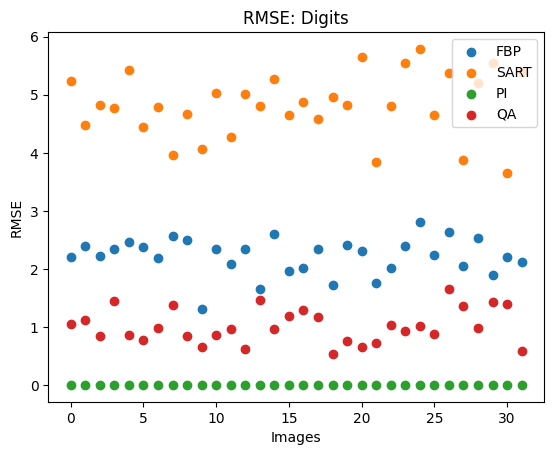

In [9]:
import matplotlib.pyplot as plt
x = np.arange(32)
plt.scatter(x, rms[:, 0], label="FBP")
plt.scatter(x, rms[:, 1], label="SART")
plt.scatter(x, rms[:, 2], label="PI")
plt.scatter(x, rms[:, 3], label="QA")
plt.xlabel("Images")
plt.ylabel("RMSE")
plt.title("RMSE: Digits")
plt.legend(loc="upper right")
plt.savefig("Results/ResultsDigits/digits_rmse.png")
plt.savefig("Results/ResultsDigits/digits_rmse.svg", format='svg')
plt.savefig("Results/ResultsDigits/digits_rmse.pdf", format='pdf')
plt.show()

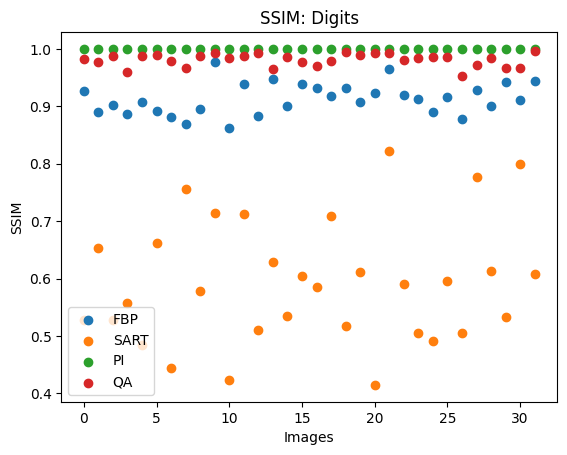

In [10]:
import matplotlib.pyplot as plt
x = np.arange(32)
plt.scatter(x, ssim[:, 0], label="FBP")
plt.scatter(x, ssim[:, 1], label="SART")
plt.scatter(x, ssim[:, 2], label="PI")
plt.scatter(x, ssim[:, 3], label="QA")
plt.xlabel("Images")
plt.ylabel("SSIM")
plt.title("SSIM: Digits")
plt.legend(loc="lower left")
plt.savefig("Results/ResultsDigits/digits_ssim.png")
plt.savefig("Results/ResultsDigits/digits_ssim.svg", format='svg')
plt.savefig("Results/ResultsDigits/digits_ssim.pdf", format='pdf')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rms[:, 0])
plt.plot(rms[:, 1])
plt.plot(rms[:, 2])
plt.show()

## Digits w/ noise

In [ ]:
search_path = 'Results/ResultsDigitsNoise/'
all_images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png")]
print(all_images)
all_images = ['1499', '956', '1440', '577', '714', '1253', '1745', '1475', '271', '1301', '19', '174', '548', '1763', '939', '97', '147', '1114', '204', '303', '1189', '1377', '553', '357', '1330', '1533', '1188', '1075', '1145', '98', '1245', '654']
for i in range(0, len(all_images), 4):
    images = all_images[i:i+4]
    print(images)
    columns = 6
    rows = len(images)
    fig, ax = plt.subplots(rows, columns, figsize=(16, 16), gridspec_kw={'hspace': -0.6, 'wspace': 0.15})
    for f, j in zip(images, range(len(images))):
        res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
        if res: 
            res_npz = np.load(search_path + f + '/' + res[0])
            image = res_npz['image']
            recon_fbp = res_npz['reconstruction_fbp']
            recon_sart = res_npz['reconstruction_sart']
            recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
            system = get_system(image)
            sinogram = res_npz['sinogram']
            recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
            ax[j, 0].imshow(image, cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 0].set_xticks([])
            ax[j, 0].set_yticks([])  
            ax[j, 1].imshow(sinogram.reshape(image.shape), cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 1].set_xticks([])
            ax[j, 1].set_yticks([])  
            # fig.add_subplot(rows, columns, j*columns + 2)
            ax[j, 2].imshow(recon_fbp, cmap='gray')
            #ax[j, 1].axis("off")
            ax[j, 2].set_xticks([])
            ax[j, 2].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 3)
            ax[j, 3].imshow(recon_sart, cmap='gray')
            # ax[j, 2].axis("off")
            ax[j, 3].set_xticks([])
            ax[j, 3].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 4)
            ax[j, 4].imshow(recon_pi, cmap='gray')
            #ax[j, 3].axis("off")
            ax[j, 4].set_xticks([])
            ax[j, 4].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 5)
            ax[j, 5].imshow(recon_qa, cmap='gray')
            #ax[j, 4].axis("off")
            ax[j, 5].set_xticks([]) 
            ax[j, 5].set_yticks([])
    cols = ["GT", "SG", "FBP", "SART", "PI", "QA"]
    for axe, col in zip(ax[0], cols):
        axe.set_title(col, size=40)
    fig.tight_layout()
    plt.savefig(search_path + f + ".png", bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
search_path = 'Results/ResultsDigitsNoise/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png")]
print(images)
images = ['553']
columns = 5
rows = len(images)
for f, i in zip(images, range(len(images))):
    res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
    if res: 
        res_npz = np.load(search_path + f + '/' + res[0])
        image = res_npz['image']
        recon_fbp = res_npz['reconstruction_fbp']
        recon_sart = res_npz['reconstruction_sart']
        recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
        system = get_system(image)
        sinogram = res_npz['sinogram'].reshape(image.shape)
        # plt.imshow(sinogram, cmap='gray')
        plt.imshow(image, cmap='gray')
        plt.show()

## Calc RMSE

In [11]:
search_path = 'Results/ResultsDigitsNoise/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg")]
rms_noise = np.zeros((32, 4))
print(images)
for f, i in zip(images, range(len(images))):
    res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
    if res: 
        res_npz = np.load(search_path + f + '/' + res[0])
        image = res_npz['image']
        recon_fbp = res_npz['reconstruction_fbp']
        recon_sart = res_npz['reconstruction_sart']
        recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
        system = get_system(image)
        sinogram = res_npz['sinogram']
        recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
        rmse_qa = get_rmse(recon_qa, image)
        rmse_fbp = get_rmse(recon_fbp, image)
        rmse_sart = get_rmse(recon_sart, image)
        rmse_pi = get_rmse(recon_pi, image)
        rms_noise[i, 0] = rmse_fbp
        rms_noise[i, 1] = rmse_sart
        rms_noise[i, 2] = rmse_pi
        rms_noise[i, 3] = rmse_qa

['1075', '1114', '1145', '1188', '1189', '1245', '1253', '1301', '1330', '1377', '1440', '147', '1475', '1499', '1533', '174', '1745', '1763', '19', '204', '271', '303', '357', '548', '553', '577', '654', '714', '939', '956', '97', '98']


## Calc SSIM

In [12]:
search_path = 'Results/ResultsDigitsNoise/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg")]
ssim_noise = np.zeros((32, 4))
print(images)
for f, i in zip(images, range(len(images))):
    res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
    if res: 
        res_npz = np.load(search_path + f + '/' + res[0])
        image = res_npz['image']
        recon_fbp = res_npz['reconstruction_fbp']
        recon_sart = res_npz['reconstruction_sart']
        recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
        system = get_system(image)
        sinogram = res_npz['sinogram']
        recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
        ssim_qa = get_ssim(recon_qa, image)[0]
        ssim_fbp = get_ssim(recon_fbp, image)[0]
        ssim_sart = get_ssim(recon_sart, image)[0]
        ssim_pi = get_ssim(recon_pi, image)[0]
        ssim_noise[i, 0] = ssim_fbp
        ssim_noise[i, 1] = ssim_sart
        ssim_noise[i, 2] = ssim_pi
        ssim_noise[i, 3] = ssim_qa

['1075', '1114', '1145', '1188', '1189', '1245', '1253', '1301', '1330', '1377', '1440', '147', '1475', '1499', '1533', '174', '1745', '1763', '19', '204', '271', '303', '357', '548', '553', '577', '654', '714', '939', '956', '97', '98']


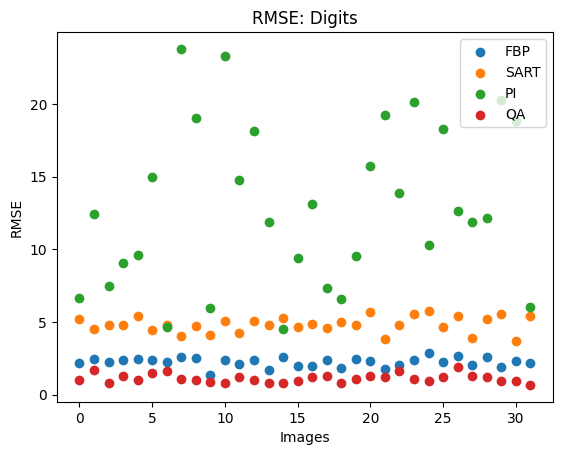

In [13]:
#RMSE
import matplotlib.pyplot as plt
x = np.arange(32)
plt.scatter(x, rms_noise[:, 0], label="FBP")
plt.scatter(x, rms_noise[:, 1], label="SART")
plt.scatter(x, rms_noise[:, 2], label="PI")
plt.scatter(x, rms_noise[:, 3], label="QA")
plt.xlabel("Images")
plt.ylabel("RMSE")
plt.title("RMSE: Digits")
plt.legend(loc="upper right")
plt.savefig("Results/ResultsDigitsNoise/digits_noise_rmse.png")
plt.savefig("Results/ResultsDigitsNoise/digits_noise_rmse.svg", format='svg')
plt.savefig("Results/ResultsDigitsNoise/digits_noise_rmse.pdf", format='pdf')
plt.show()

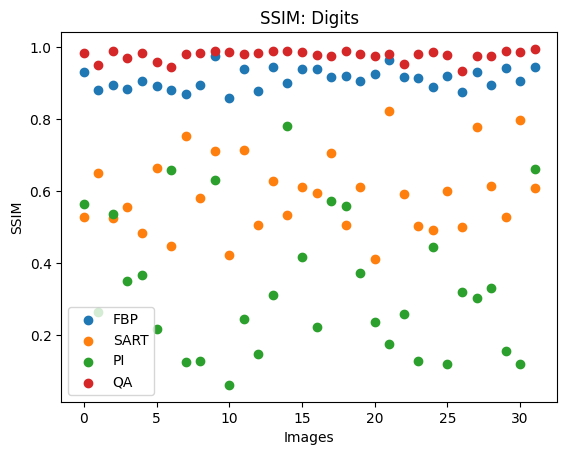

In [14]:
#SSIM
import matplotlib.pyplot as plt
x = np.arange(32)
plt.scatter(x, ssim_noise[:, 0], label="FBP")
plt.scatter(x, ssim_noise[:, 1], label="SART")
plt.scatter(x, ssim_noise[:, 2], label="PI")
plt.scatter(x, ssim_noise[:, 3], label="QA")
plt.xlabel("Images")
plt.ylabel("SSIM")
plt.title("SSIM: Digits")
plt.legend(loc="lower left")
plt.savefig("Results/ResultsDigitsNoise/digits_noise_ssim.png")
plt.savefig("Results/ResultsDigitsNoise/digits_noise_ssim.svg", format='svg')
plt.savefig("Results/ResultsDigitsNoise/digits_noise_ssim.pdf", format='pdf')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
rms_mean = np.sum(rms, axis=0)/32
rms_noise_mean = np.sum(rms_noise, axis=0)
print(rms_mean.shape)
print(rms_noise_mean.shape)

x = np.array([1, 2, 3, 4])
y = rms_mean
e = [np.std(rms[:, 0]), np.std(rms[:, 1]), np.std(rms[:, 2]), np.std(rms[:, 3])]
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.xticks(x, ['FBP', 'SART', 'PI', 'QA'])
plt.xlabel("Reconstructions")
plt.ylabel("RMSE [Absolut value]")
plt.title("RMSE: Digits over all images")
plt.savefig("Results/ResultsDigitsNoise/digits_rmse_variance.png")
plt.savefig("Results/ResultsDigitsNoise/digits_rmse_variance.svg", format='svg')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
rms_mean = np.sum(rms, axis=0)/32
rms_noise_mean = np.sum(rms_noise, axis=0)/32
print(rms_mean.shape)
print(rms_noise_mean.shape)

x = np.array([1, 2, 3, 4])
y = rms_noise_mean
e = [np.std(rms_noise[:, 0]), np.std(rms_noise[:, 1]), np.std(rms_noise[:, 2]), np.std(rms_noise[:, 3])]
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.xticks(x, ['FBP', 'SART', 'PI', 'QA'])
plt.xlabel("Reconstructions")
plt.ylabel("RMSE [Absolut value]")
plt.title("RMSE: Digits over all images")
plt.savefig("Results/ResultsDigitsNoise/digits_noise_rmse_variance.png")
plt.savefig("Results/ResultsDigitsNoise/digits_noise_rmse_variance.svg", format='svg')
plt.show()

# Digits underdetermined - no noise 

In [ ]:
search_path = 'Results/UnderdeterminedResultsDigits4/'
no_angles = 4
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png")]
print(images)
all_images = ['1499', '956', '1440', '577']
for i in range(0, len(all_images), 4):
    images = all_images[i:i+4]
    print(images)
    columns = 6
    rows = len(images)
    fig, ax = plt.subplots(rows, columns, figsize=(16, 16), gridspec_kw={'hspace': -0.6, 'wspace': 0.15})
    for f, j in zip(images, range(len(images))):
        res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
        if res: 
            res_npz = np.load(search_path + f + '/' + res[0])
            image = res_npz['image']
            recon_fbp = res_npz['reconstruction_fbp']
            recon_sart = res_npz['reconstruction_sart']
            recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
            system = get_system(image, no_angles = no_angles)
            sinogram = res_npz['sinogram']
            recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
            ax[j, 0].imshow(image, cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 0].set_xticks([])
            ax[j, 0].set_yticks([])  
            plt_sinogram = sinogram.reshape(image.shape[0], no_angles)
            embed = np.zeros(image.shape)
            embed[:, :no_angles] = plt_sinogram
            ax[j, 1].imshow(embed, cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 1].set_xticks([])
            ax[j, 1].set_yticks([])  
            # fig.add_subplot(rows, columns, j*columns + 2)
            ax[j, 2].imshow(recon_fbp, cmap='gray')
            #ax[j, 1].axis("off")
            ax[j, 2].set_xticks([])
            ax[j, 2].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 3)
            ax[j, 3].imshow(recon_sart, cmap='gray')
            # ax[j, 2].axis("off")
            ax[j, 3].set_xticks([])
            ax[j, 3].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 4)
            ax[j, 4].imshow(recon_pi, cmap='gray')
            #ax[j, 3].axis("off")
            ax[j, 4].set_xticks([])
            ax[j, 4].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 5)
            ax[j, 5].imshow(recon_qa, cmap='gray')
            #ax[j, 4].axis("off")
            ax[j, 5].set_xticks([]) 
            ax[j, 5].set_yticks([])
    cols = ["GT", "SG", "FBP", "SART", "PI", "QA"]
    for axe, col in zip(ax[0], cols):
        axe.set_title(col, size=40)
    fig.tight_layout()
    plt.savefig(search_path + f + ".png", bbox_inches='tight')

In [ ]:
search_path = 'Results/UnderdeterminedResultsDigits2/'
no_angles = 2
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png")]
rms_noise = np.zeros((28, 4))
m = 8
print(images)
for f, i in zip(images, range(len(images))):
    res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
    if res: 
        res_npz = np.load(search_path + f + '/' + res[0])
        image = res_npz['image']
        recon_fbp = res_npz['reconstruction_fbp']
        recon_sart = res_npz['reconstruction_sart']
        recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
        system = get_system(np.zeros((m, m)), no_angles=no_angles)
        sinogram = res_npz['sinogram']
        recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
        rmse_qa = get_rmse(recon_qa, image)
        rmse_fbp = get_rmse(recon_fbp, image)
        rmse_sart = get_rmse(recon_sart, image)
        rmse_pi = get_rmse(recon_pi, image)
        rms_noise[i, 0] = rmse_fbp
        rms_noise[i, 1] = rmse_sart
        rms_noise[i, 2] = rmse_pi
        rms_noise[i, 3] = rmse_qa

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(28)
plt.scatter(x, rms_noise[:, 0], label="FBP")
plt.scatter(x, rms_noise[:, 1], label="SART")
plt.scatter(x, rms_noise[:, 2], label="PI")
plt.scatter(x, rms_noise[:, 3], label="QA")
plt.xlabel("Images")
plt.ylabel("RMSE [Absolut value]")
plt.title("RMSE: Digits")
plt.legend(loc="upper right")
plt.savefig("Results/UnderdeterminedResultsDigits2/digits_underdetermined_rmse.png")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
rms_mean = np.sum(rms_noise, axis=0)/32
rms_noise_mean = np.sum(rms_noise, axis=0)
print(rms_mean.shape)
print(rms_noise_mean.shape)

x = np.array([1, 2, 3, 4])
y = rms_mean
e = [np.std(rms_noise[:, 0]), np.std(rms_noise[:, 1]), np.std(rms_noise[:, 2]), np.std(rms_noise[:, 3])]
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.xticks(x, ['FBP', 'SART', 'PI', 'QA'])
plt.xlabel("Reconstructions")
plt.ylabel("RMSE [Absolut value]")
plt.title("RMSE: Digits over all images")
plt.savefig("Results/UnderdeterminedResultsDigits2/digits_underdetermined_rmse_variance.png")
plt.show()